In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import edhec_risk_kit as erk
import yfinance as yf
import seaborn as sns
from datetime import date
from pandas_datareader import data
import work as work
import investpy

import plotly.express as px
import plotly.graph_objects as go
import plotly

import ipywidgets as widgets
from ipywidgets import interact, interact_manual
from IPython.core.display import display, HTML


%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [12]:
#data = work.updated_world_indices(category = 'Major', timeframe='Weekly')
#hmap = data[0]
#rawdata = data[1]

In [13]:
#rawdata.to_excel('rawdata.xlsx')

# Weekly Global Market Report


<div style="font-size: 15px">
<br>
    <b> Date: </b>  8<sup>th</sup> August, 2020
</div>

<a id ="content"></a>
## Contents:

1. [World Equities](#eq)
2. [Fixed Income](#fi)
3. [Currencies (FX)](#cur)
4. [Commodities](#comd)
5. [Charts of the Week](#charts)
6. [Key Economic Events - Next Week](#eco)

<a id ="eq"></a>
## World Equities

### Local Currency & USD Performance (Weekly & YTD)
*Data is sorted by Weekly USD Performance (%)

In [15]:
rawdata = pd.read_excel('rawdata.xlsx', sheet_name='Equities', header=0, index_col=0)
def hmap(sortby):
    hmap = rawdata.sort_values(by=sortby, ascending=False)
    hmap = hmap.style.format({'Price (EOD)': "{:.2f}",'Chg': "{:.2f}", 'Chg (%)': "{:.2%}", 'Chg YTD (%)': "{:.2%}", '$ Chg (%)': "{:.2%}", '$ Chg YTD (%)': "{:.2%}"})\
                         .background_gradient(cmap='RdYlGn', subset=list(hmap.drop(['Price (EOD)', 'Chg', 'Country'], axis=1).columns))
    return hmap
    
style = {'description_width': 'initial'}
interact(hmap,
             sortby = widgets.Dropdown(options=(('Weekly LCL Returns', 'Chg (%)'), ('YTD LCL Returns', 'Chg YTD (%)'),
                                                ('Weekly USD Returns', '$ Chg (%)'), ('YTD USD Returns', '$ Chg YTD (%)')),
                                                value = '$ Chg (%)', style=style, description='Sort By: '));

interactive(children=(Dropdown(description='Sort By: ', index=2, options=(('Weekly LCL Returns', 'Chg (%)'), (…

In [35]:
def perf(tf):
    rawdata1 = rawdata.sort_values(by=tf, ascending=False)
    weekly_usd = rawdata1
    weekly_usd = ((pd.DataFrame(weekly_usd[tf]*100)).dropna().sort_values(by=tf, ascending=False))
    fig = px.bar(weekly_usd, color=weekly_usd.values, text=rawdata1['Country'], color_continuous_scale='rdylgn')

    fig.update_layout(title = 'World Indices Performance (%) in US Dollar Terms (EOD)',
                       xaxis_title='Indices',
                       yaxis_title='Return (%)', font=dict(family="Segoe UI, monospace", size=13, color="#282828"),
                       legend_title_text='Return(%)', plot_bgcolor = 'White', yaxis_tickformat = '{:.2f}%', hovermode='x', width=1200, height=600)
    fig.update_traces(hovertemplate='Index: %{x} <br>Country: %{text} <br>Return: %{y:.2f}%') 
    fig.update_yaxes(automargin=True)
    fig.show()
    
interact(perf,
             tf = widgets.Dropdown(options=(('Weekly USD','$ Chg (%)'),('YTD USD','$ Chg YTD (%)')),
                                                   value = '$ Chg (%)', style=style, description='Timeframe: '));

interactive(children=(Dropdown(description='Timeframe: ', options=(('Weekly USD', '$ Chg (%)'), ('YTD USD', '$…

**HIGHLIGHTS**:

- US equities rallied this week as markets looked past ongoing failure to contain the coronavirus pandemic and eyed a potential stimulus deal at Capitol Hill. Investors are also monitoring US-China tension and Microsoft’s plan to purchase Tik Tok’s US operation. In fact, President Trump had signed two executive orders banning U.S. residents from doing any business with TikTok, WeChat 45 days from now.


- All main indexes extended from previous week’s gains – the Dow Jones rose 3.6% week-to-date, the S&P500 added 2.4% while NASDAQ (+3.4%) hit record high and closed above 11000 for the first time in history. Tech shares drove the gains thanks to robust earnings report and general views that the sector would fare better in a pandemic.


- Tencent, Electronic Arts, and Activision Blizzard shares were down 5% on Friday but were down as much as 10% during the session in Hong Kong as the Trump administration bans Tencent’s WeChat in the US following the recent ban of TikTok that is still struggling to find a buyer. This has potential ramifications for US companies as China is most likely planning a countermeasure that could hit certain companies within gaming. Electronic Arts and Activision Blizzard are the two most vulnerable companies to this scenario.


- Booking reported Q2 revenue of \\$630mn down 84\% y/y but beating estimates of \$569mn – shares jumped 4% in extended trading. The Q3 is seasaonally the strongest quarter during the year and with the latest resurgence of COVID-19 cases this will be a crucial quarter in terms of investor sentiment in the short-term. Management says that they have seen improvements since April in line with easing of restrictions across many geographies. Newly booked room nights are only down 35% y/y in July giving a clearer picture of actual demand drop in a world with moderate restrictions and no vaccine.


- Uber Q2 earnings after the close showed a 75% decline in mobility bookings to \\$3.05bn missing estimates while delivery bookings rose 106\% y/y to \\$7bn beating estimates - shares were down 3% in extended trading. Adjusted EBITDA was \$837mn, a bit better than expected, with management reaffirming that it become profitable by end of 2021 on this adjusted measure. The fact that management reaffirms this forecast with such an uncertain outlook for mobility underscores the pressure on Uber to maintain the narrative of profitable just around the corner. We remain of the view that this is not feasible by end of next year and shareholders will continue be disappointed over the lack of profitability.


- Q2 earnings season is approaching an end as 88\% of S&P 500 companies have reported so far. Results have beaten very depressed estimates with a record 83\% of companies beating on the bottom line (above the five-year average of 73\%) and aggregate results have been 23\% above estimates (well above the five-year average of 4.7\%). The beats were fairly broad-based with notable strength from Consumer Discretionary and Industrials.




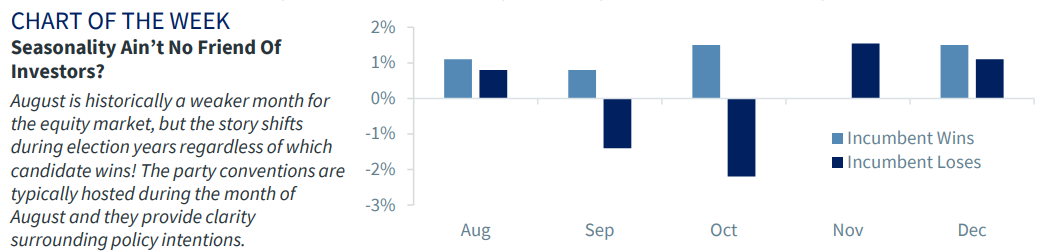

- The Equity put/call ratio (10 day moving average) has reached very low levels, only seen a handful of times over the past 20 years. Interestingly, the last 3 instances were coming out of recessionary bear markets. In those periods, there was a bit of a stall in the market’s advance as consolidation occurred in the short term. That said, those short term pullbacks or consolidations proved to result in good buying opportunities for the longer term. 

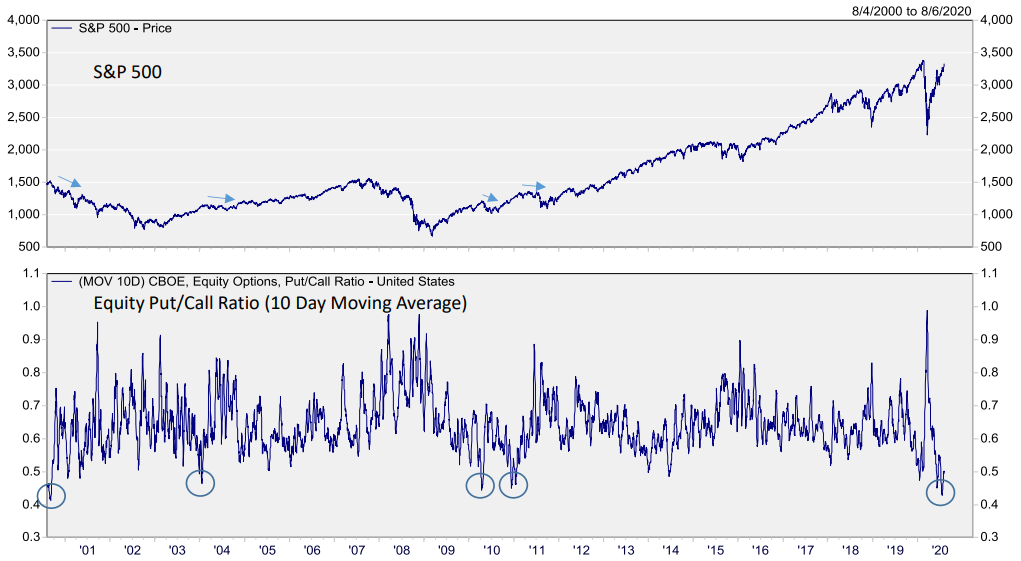


- On the data front, manufacturing PMI points to synchronised recovery across global factories whereas the services PMI offered a more uneven picture, suggesting that the pandemic is still dragging on consumer spending and the broader services industry as a whole. Other notable data of the week include slower job growth in the US private sector (ADP payrolls rose a mere 167k in July. Initial jobless claims fell to 1.2mil last week).


- The July employment report gave a sense of relief to the market that the job market is trending in the right direction again. Headline numbers were solid, but some distortions already have economists looking to the August report for better clarity. Nonfarm payrolls rose 1.76M last month and the jobless rate fell to 10.2\%. But at least half of that payrolls number seems impermanent.


- The biggest gain in payrolls came in the leisure and hospitality sector, which added 592K jobs. Of those, 502K came from restaurants and bars as states relaxed lockdown rules. Amusements, gambling and recreation added 99.6K jobs, while performing arts and spectator sports lost 12.8K. The survey period for the data is just through the first half of July and wouldn't capture a lot of moves by states to shut down bars and indoor dining after a spike in cases.


- There was also a seasonal distortion in education jobs. Local government education added 215K jobs and state government education added 30K. "Typically, public-sector education employment declines in July (before seasonal adjustment). However, employment declines occurred earlier than usual this year due to the pandemic, resulting in unusually large July increase," the BLS said. "That will be reversed ... especially given the number of school districts that have gone online," Grant Thornton Chief Economist Diane Swonk told CNBC. "That will suppress those numbers as we move into August."


- Without these classification errors, the unemployment rate would've been a percentage point higher, Danny Blanchflower, economics professor at Dartmouth, told Bloomberg. The number of those out of work for more than 15 weeks jumped to 8M from 3.3M in June. As a percentage of workers, the longer-term unemployed rose to 48.8\% from 18.7\%. More encouraging, permanent jobs losers remained about flat.



- The week ahead see the release of more economic data. The week kicks off with China CPI and PPI inflation, New Zealand Business Confidence and Eurozone Sentix investor Confidence Index. This is followed by UK job report, the Germany ZEW Expectation Survey, and the US NFIB Small Business Optimism Index on Tuesday. On the same day, Singapore’s final GDP reading for 2Q, Australia business confidence and New Zealand retail card spending are on the deck.


- Wednesday morning would be dominated by data and event from down under. The RBNZ is expected to keep its official cash rate steady at 0.25%. Neighbouring Australia wage price index and consumer confidence are also in the pipeline. After that market will switch focus to UK 2Q GDP report, Eurozone industrial production and US CPI inflation in the evening.


- Thursday data are limited to Australia job report in the morning, UK RICS house price index and US jobless claims numbers. Last but not least, Friday is packed with Malaysia 2Q GDP report, China monthly key indicators, Hong Kong GDP, Eurozone GDP as well as US retail sales, industrial productions and consumer confidence. 

[Back to Table of Contents](#content)

<a id ="fi"></a>
## Fixed Income

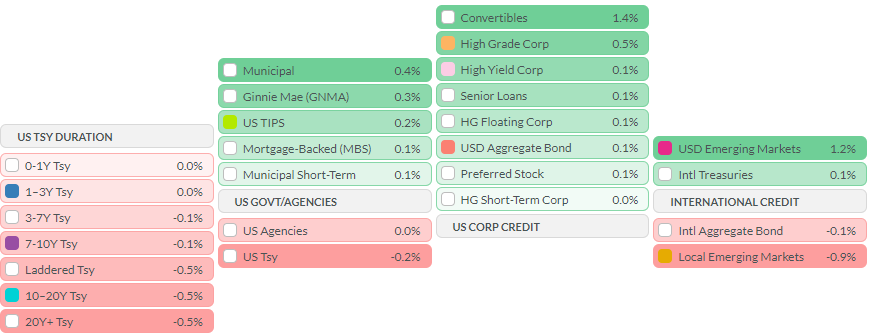

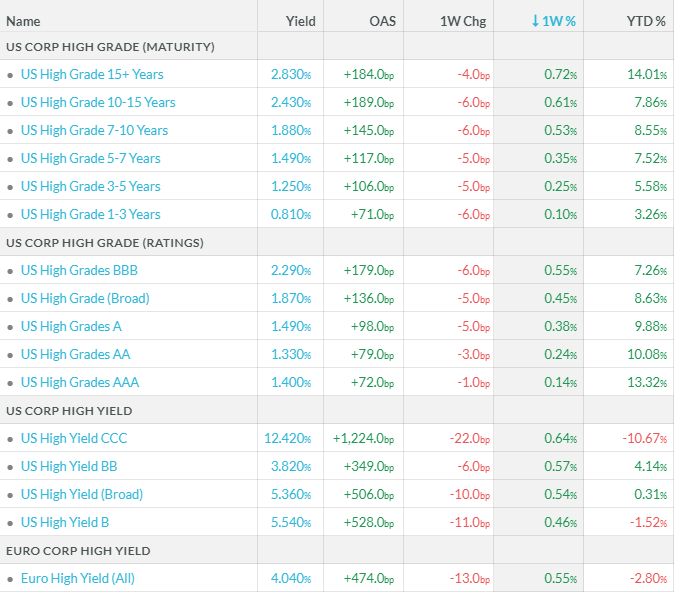

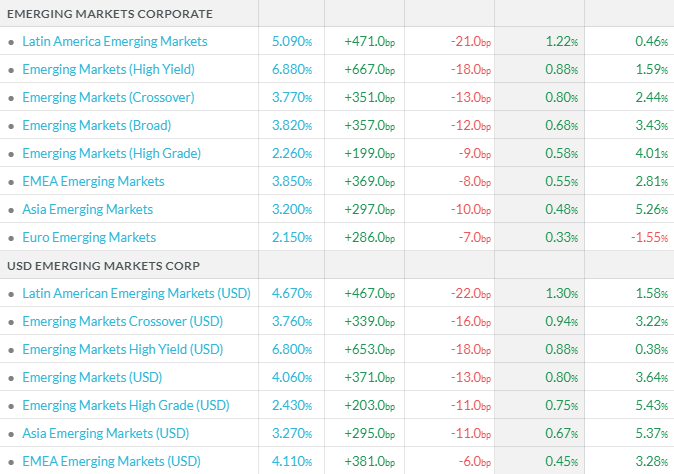

- The week under review saw US Treasuries trade between risk-on and off mode as the new COVID-19 relief bill remains unresolved whilst the stronger-than-expected ISM Services data put a spanner in the works during mid-week. Overall benchmark yields were range-bound with levels closing marginally lower i.e. between 0-2bps. The 2Y benchmark; reflective of interest rate predictions ended unchanged at 0.11%.


- The much-watched 10Y (which traded within a tighter 0.51%-0.55% range); edged 1bps lower at 0.54%. Meanwhile traders noted with some concerns; the record supply of quarterly refunding package (beginning with auctions totaling $112b next week). Bull flattening in UST’s has sent the 2s10s spread to its lowest level since end-April, the latest evidence that U.S. yield curve continues to struggle to steepen following the refunding announcement.


- US high yield’s default rate of 6.2% for the last 12 months (as at the end of July), while lower than previous crisis levels, far exceeds the 1.8% rate for Europe. State-backed loans and access to capital markets have limited insolvencies considerably, but the cost is further indebtedness. 


- Ironically, recognition of this fact by the rating agencies – and the subsequent unprecedented downward ratings migration – has kept the overall credit quality of both high yield markets stable, as the large number of fallen angels has bolstered the supply of high quality BBs. The US high yield market remains one notch below Europe’s average rating at B+ vs. BB-, yet it has still managed to outperform of late.


- US high yield posted total returns of 4.75% in July, well ahead of the 1.72% return for European high yield. While excess returns (returns driven by credit, excluding the impact of base rates) for the US were also more than double those for Europe in July, Europe has actually outperformed on this basis year to date. Therefore, differences in the underlying rates markets have been a significant driver of US high yield’s outperformance. 


- To put this into context, the benchmark five-year US Treasury yield has moved 1.50% lower this year to 0.19%, while the five-year German Bund yield is only 0.25% lower at -0.73%. US high yield has also looked more appealing on a relative value basis for income-seeking investors. Hedging costs have fallen dramatically this year, such that US high yield offers a euro investor a yield-to-worst of 4.70% on a hedged basis (5.44% on an unhedged basis), vs. Europe’s 4.32%, which has likely been a driver of stronger flows into the US. (Data as of 4 August 2020.)


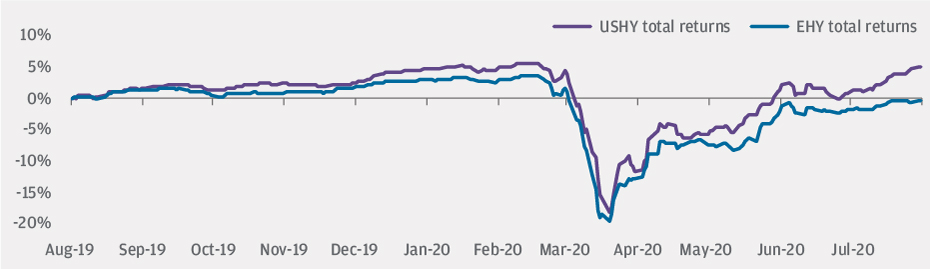

Source: ICE. USHY = ICE BofA US High Yield Constrained Index (HUC0). EHY = ICE BofA Euro Developed Markets Non-Financial High Yield Constrained Index (HECM). Data as of 4 August 2020.



- Demand continues to run well ahead for US vs. European high yield. Fund flows reveal that US high yield retail funds have seen net inflows of over USD 40 billion this year, whereas European high yield flows are still negative, with over EUR 7 billion of outflows. Divergent supply pictures have also been a driver of relative performance. 


- The primary market in both regions now looks to be almost shut down for the summer period, but it slowed gradually for Europe in July, vs. a steeper decline for the US, with July issuance tracking about half of June’s level. The stronger technical support for the US is evident in the fact that the main US high yield ETF (HYG) is trading at around its long-term average premium to NAV, whereas the European high yield ETF (IHYG) is trading flat to its NAV for the first time since May. (Data as of 4 August 2020).


- The outperformance of US high yield is largely down to three factors. First, duration has performed better in the US. Second, the reduced cost of hedging US dollar assets to euros has made the market appealing for European investors. Third, US technicals have been more favourable. Absent a change in credit fundamentals, Europe could start to outperform, as US rates have already moved substantially and the supply picture in both primary markets is now similar given the August shutdown. 


- The European market could also benefit from its higher quality status, as investors are increasingly recognising that markets have shrugged off the potential for worse data releases. In any event, both markets look set to grind tighter in the short term, given that technical conditions still seem to be supporting current valuations.


[Back to Table of Contents](#content)

<a id ="cur"></a>
## Currencies (FX)

In [18]:
ccy = pd.read_excel('World_Indices_List.xlsx', sheet_name='Currencies', header=0)
ccy_data = yf.download(list(ccy['Ticker']), start='2020-01-01', progress=False)
ccy_data = ccy_data['Close'].ffill()

In [19]:
def ccy_perf():
    oned_lcl = pd.concat([(ccy_data.iloc[-1,:]/ccy_data.iloc[-6,:]-1),
                            (ccy_data.iloc[-1,:]/ccy_data.iloc[0,:]-1)], axis=1)
    oned_lcl.columns = ['Chg WTD (%)', 'Chg YTD (%)']
    oned_lcl.index.name = 'Ticker'
    oned_lcl = ccy.merge(oned_lcl, on='Ticker')
    oned_lcl= oned_lcl.set_index('Ticker')
    return oned_lcl

ccy = ccy_perf()

In [20]:
def ccy_hmap(sortby):   
    hmap = ccy.sort_values(by=sortby, ascending=False)
    hmap = hmap.style.format({'Chg WTD (%)': "{:.3%}", 'Chg YTD (%)': "{:.2%}"})\
                         .background_gradient(cmap='RdYlGn', subset=list(ccy.drop(['Name'], axis=1).columns))
    return hmap
    
interact(ccy_hmap,
             sortby = widgets.Dropdown(options=(('Weekly', 'Chg WTD (%)'), ('YTD', 'Chg YTD (%)')),
                                                value = 'Chg WTD (%)', style=style, description='Sort By: '));

interactive(children=(Dropdown(description='Sort By: ', options=(('Weekly', 'Chg WTD (%)'), ('YTD', 'Chg YTD (…

### Top Currencies Live Cross Rates

In [21]:
HTML("""
<!-- TradingView Widget BEGIN -->
<div class="tradingview-widget-container">
  <div class="tradingview-widget-container__widget"></div>
  <div class="tradingview-widget-copyright"><a href="https://www.tradingview.com/markets/currencies/forex-cross-rates/" rel="noopener" target="_blank"><span class="blue-text">Forex Rates</span></a> by TradingView</div>
  <script type="text/javascript" src="https://s3.tradingview.com/external-embedding/embed-widget-forex-cross-rates.js" async>
  {
  "width": 770,
  "height": 400,
  "currencies": [
    "EUR",
    "USD",
    "JPY",
    "GBP",
    "CHF",
    "AUD",
    "CAD",
    "NZD",
    "CNY"
  ],
  "isTransparent": false,
  "colorTheme": "light",
  "locale": "en"
}
  </script>
</div>
<!-- TradingView Widget END -->
""")

In [34]:
def perf_ccy(timeframe):
    weekly_usd = ccy
    if timeframe=='Weekly':
        weekly_usd1 = ccy.sort_values(by='Chg WTD (%)', ascending=False)
        weekly_usd = ((pd.DataFrame(weekly_usd['Chg WTD (%)']*100)).sort_values(by='Chg WTD (%)', ascending=False))
        fig = px.bar(weekly_usd, color=weekly_usd.values, text=weekly_usd1['Name'], color_continuous_scale='rdylgn')

    elif timeframe=='YTD':
        weekly_usd1 = ccy.sort_values(by='Chg YTD (%)', ascending=False)
        weekly_usd = ((pd.DataFrame(weekly_usd1['Chg YTD (%)']*100)).sort_values(by='Chg YTD (%)', ascending=False))
        fig = px.bar(weekly_usd, color=weekly_usd.values, text=weekly_usd1['Name'])

    fig.update_layout(title = 'World Currencies ' + str(timeframe) + ' Performance (%)',
                       xaxis_title='Indices',
                       yaxis_title='Return (%)', font=dict(family="Segoe UI, monospace", size=13, color="#7f7f7f"),
                       legend_title_text='Return(%)', plot_bgcolor = 'White', yaxis_tickformat = '{:.2f}%', hovermode='x')
    fig.update_traces(hovertemplate='Ticker: %{x} <br>Name: %{text} <br>Return: %{y:.2f}%') 
    fig.update_yaxes(automargin=True)
    fig.show()
    
interact(perf_ccy,
             timeframe = widgets.Dropdown(options=('Weekly','YTD'),
                                                value = 'Weekly', style=style, description='Timeframe: '));

interactive(children=(Dropdown(description='Timeframe: ', options=('Weekly', 'YTD'), style=DescriptionStyle(de…

**HIGHLIGHTS:**


- **USD:** Friday’s NFP jobs data supported the narrative of recovery and US data in the week ahead is expected to do likewise. Probably more dominant for the dollar will be two key issues: i) is there any progress on the Phase IV stimulus plan and ii) how does China retaliate to the latest sanctions from the White House, possibly including against HK Chief Executive, Carrie Lam. The rally in Asian FX (including the Renminbi) has been helpful to the broader dollar decline, thus a sharp re-opening of political tension could favour dollar consolidation/correction. However, investors are really sinking their teeth into the negative US real yield story ahead of the 16 Sep FOMC meeting and any corrective dollar rallies (even if they are violent) could be short-lived. 



- **EUR**: EUR/USD looks as though it has entered a brief period of consolidation. Given the huge cross-correlation in reflationary assets these days (including a possible bubble in silver), the risk is growing of a short, sharp correction. There is outside risk that EUR/USD quickly trades down to the 1.1630/50 area – e.g. were US-China tension or continued failure over the Phase IV stimulus to trigger a stock market correction.


- Eurozone data this week includes investor sentiment data for August, July Eurozone industrial production and the first revision to some of the 2Q20 GDP data. Our team feel that sectors outside retail, including the industrial sector, maybe a little slower to recover – thus softening the V shape narrative. In all, however, EUR/USD should be dominated by events in Washington and Beijing, including any Fed speakers providing any insights into the average inflation target debate.



- **GBP**: GBP enjoyed a small rally on BoE-day, but the rally is already fading. The week ahead could pour some cold water on some emerging GBP optimism. Here the focus will be on: i) June employment figures and ii) 2Q GDP. On the former, the market expects unemployment to rise to 4.2% from 3.9%. Getting a good handle on the employment situation is hard because of the furlough scheme (12 million having taken advantage of it), but the BoE is eventually expecting the unemployment rate to hit 7% plus. On GDP, the market expects a 20% QoQ contraction. The BoE is slightly more optimistic.



- **JPY**: USD/JPY has returned to trading narrow ranges after recent excitement. A hot topic is the idea of Japanese fund managers doing some of the government’s work by buying USD/JPY below 105. The latest MoF data did show a pick-up in Japanese foreign bond buying – though it is too early to say if this is a sustained trend. What we do know, however, is that if the Fed is successful with its ‘opportunistic reflation’ exercise – keeping rates low, driving inflation higher – then USD/JPY should be headed towards 100.   


- Local data sees the June current surplus released. The market is expecting a renewed pick-up here after a collapse during the crisis. A healthier balance would add to the negative USD/JPY story.


- **AUD**: The Reserve Bank of Australia meeting was no game-changer for the AUD, but the Statement on Monetary Policy released on Friday was characterized by a rather downbeat view on the economic recovery, with the growth forecasts for 2020 downgraded to -4% and the unemployment rate seen peaking at 10%.


- The jobs report is the key highlight in the Australian calendar next week, as the rebound in employment is expected to have slowed in July. It will be key to monitor any signs of life in full time employment. Still, most eyes will be on the developments in the contagion curve in the State of Victoria. In FX terms, AUD can be seen as the commodity currency bearing the biggest risk of a correction if market sentiment shows more fragility, especially in the case of further escalation in US-China tensions.


- **TRY**: The Lira being the worst performers, lost 3.5% this week. Turkish authorities capped a tumultuous week in the financial markets by tightening monetary policy, helping to pull the lira back from a record low. The central bank on Friday stopped funding local lenders from its one-week repurchase rate, forcing the banks to borrow from a more expensive overnight window. If sustained, the move will amount to a 150 basis-point interest rate hike. 


- The yield on two-year government bonds jumped 73 basis points to 12.99%. The cost of insuring government debt against default dipped for the first time in four days, falling below 600 basis points. In a country where savings are disproportionately held in foreign currency, sharp moves in the U.S. dollar usually fuel criticism of economic management. Thursday was no exception with tens of thousands of Twitter users calling for resignation of Berat Albayrak, Erdogan’s son-in-law and the Minister of Treasury and Finance since July 2018.

[Back to Table of Contents](#content)

<a id ="comd"></a>
## Commodities

In [25]:
comds= pd.read_excel('World_Indices_List.xlsx', sheet_name='Commodities', header=0)

In [26]:
tdy = str(date.today().day)+'/'+str(date.today().month)+'/'+str(date.today().year)

def comd_data(commodity):
    df = investpy.get_commodity_historical_data(commodity=commodity, from_date='01/01/2020', to_date=tdy)['Close']
    df = pd.DataFrame(df)
    df.columns = [commodity]
    return df

df = pd.DataFrame(index=pd.bdate_range(start='2020-01-01', end=date.today()))
df.index.name='Date'

for i in range(len(comds)):
    df = df.join(comd_data(comds['Commodities'][i]), on='Date')

df = df.ffill().dropna()
df.to_excel('comd1.xlsx')

C:\Users\Harsh\Anaconda3\lib\site-packages\investpy\commodities.py:523: Warning:

Note that the displayed commodity data can differ depending on the country. If you want to retrieve copper data from either united states or united kingdom, specify the country parameter.



In [28]:
df = pd.read_excel('rawdata.xlsx', sheet_name='Commodities', header=0, index_col=0)

In [29]:
def comd_perf():
    oned_lcl = pd.concat([df.iloc[-1,:], (df.iloc[-1,:]/df.iloc[-6,:]-1),
                            (df.iloc[-1,:]/df.iloc[0,:]-1)], axis=1)
    oned_lcl.columns = ['Price (EOD)', 'Chg WTD (%)', 'Chg YTD (%)']
    oned_lcl.index.name = 'Commodities'
    return oned_lcl

comd = comd_perf()

In [30]:
def comd_hmap(sortby):   
    hmap = comd.sort_values(by=sortby, ascending=False)
    hmap = hmap.style.format({'Price (EOD)': "{:.2f}", 'Chg WTD (%)': "{:.2%}", 'Chg YTD (%)': "{:.2%}"})\
                         .background_gradient(cmap='RdYlGn', subset=list(hmap.drop(['Price (EOD)'], axis=1).columns))
    return hmap
    
interact(comd_hmap,
             sortby = widgets.Dropdown(options=(('Weekly', 'Chg WTD (%)'), ('YTD', 'Chg YTD (%)')),
                                                value = 'Chg WTD (%)', style=style, description='Sort By: '));

interactive(children=(Dropdown(description='Sort By: ', options=(('Weekly', 'Chg WTD (%)'), ('YTD', 'Chg YTD (…

In [33]:
def perf_comd(timeframe):
    weekly_usd = comd
    if timeframe=='Weekly':
        weekly_usd1 = comd.sort_values(by='Chg WTD (%)', ascending=False)
        weekly_usd = ((pd.DataFrame(weekly_usd['Chg WTD (%)']*100)).dropna().sort_values(by='Chg WTD (%)', ascending=True))
        fig = px.bar(weekly_usd, color=weekly_usd.values, orientation='h', color_continuous_scale='rdylgn')

    elif timeframe=='YTD':
        weekly_usd1 = comd.sort_values(by='Chg YTD (%)', ascending=False)
        weekly_usd = ((pd.DataFrame(weekly_usd1['Chg YTD (%)']*100)).dropna().sort_values(by='Chg YTD (%)', ascending=True))
        fig = px.bar(weekly_usd, color=weekly_usd.values, orientation='h')

    fig.update_layout(title = 'Commodities ' + str(timeframe) + ' Performance (%)',
                       xaxis_title='Return (%)',
                       yaxis_title='Commodities', font=dict(family="Segoe UI, monospace", size=13, color="#7f7f7f"),
                       legend_title_text='Return(%)', plot_bgcolor = 'White', yaxis_tickformat = '{:.2f}%', hovermode='x')
    fig.update_traces(hovertemplate='Commodity: %{y} <br>Return: %{x:.2f}%') 
    fig.update_yaxes(automargin=True)
    fig.show()
    
interact(perf_comd,
             timeframe = widgets.Dropdown(options=('Weekly','YTD'),
                                                value = 'Weekly', style=style, description='Timeframe: '));

interactive(children=(Dropdown(description='Timeframe: ', options=('Weekly', 'YTD'), style=DescriptionStyle(de…

**HIGHLIGHTS:**


- Oil prices were down early on Friday as demand concerns persist, but prices were on track for a weekly gain after hitting a five-month high as the U.S. dollar weakened and U.S. crude oil inventories fell. Earlier this week, both benchmarks hit their highest levels since early March, just before Saudi Arabia and Russia broke up the previous OPEC+ pact and engaged in a price war for market share at a time when the pandemic was crushing global oil demand.


- Prices were supported by a weakening of the U.S. dollar, which typically makes buying oil cheaper for holders of other currencies. The price of oil was also supported on Tuesday and Wednesday by the two reports of a crude oil inventory draw in the United States. On Tuesday, the American Petroleum Institute (API) reported a draw in crude oil inventories of 8.587 million barrels for the week ending July 31—a larger draw than analysts had expected.


- Then on Wednesday, the EIA estimated that U.S. crude oil inventories had shed 7.4 million barrels during the week to July 31, sending oil prices surging later on Wednesday and into Thursday. On Friday, oil prices were down in the morning as fears that rising COVID-19 cases in many parts of the world would further stall oil demand recovery.


- China’s imports of major commodities including crude oil, iron ore and soybeans all surged from a year earlier with the country snapping up raw materials as its economy revives following a hit from the coronavirus pandemic. 


- An analyst at CRU mentioned that, “(The record high) is due to the continuously open arbitrage, which only closed around July 20. Demand was especially good in (the second quarter) because it was pushed back from (the first quarter). But I just visited some copper consumers in Jiangsu province and they say demand for refined copper is just so-so. Refined copper consumption in (the third quarter) could be lower on a quarterly basis.” “Demand for copper from the air conditioning sector is good – production in July and August was better than expected.”


- **Copper** being one of the worst performers in the commodity complex dropped -2.63% for the week and was down almost 4% Friday. As mentioned in the previous weekly report, copper positioning was looking stretched and momentum was seen to be fading. The supply tailwind has been diminishing. Chilean firm Codelco, the world’s top copper producer, reported a 4.7% rise in January-June output, while expected labour strikes at two Chilean mines did not happen last month. Meanwhile, June copper output in Peru, the world’s No. 2 copper producer, jumped 40.8% from a month earlier as mining activities resumed. January-June copper output, however, plunged due to lockdowns. 


- **Gold** futures finished sharply lower Friday, snapping a five-session streak of record settlements, as investors contended with a firming U.S. dollar and a monthly employment report on the U.S. labor market that fell mostly in line with expectations. The decline for bullion comes as the dollar popped 0.8% higher in the session, approaching its first weekly gain in the past six weeks, dating back to a 0.3% weekly gain in the period ended June 19, as gauged by the ICE U.S. Dollar Index.


- **Silver & Platinum** were the top performers this week in the metals complex, gaining as much as 13.8% and 6.7% respectively.

[Back to Table of Contents](#content)

<a id ="charts"></a>
### CHARTS OF THE WEEK

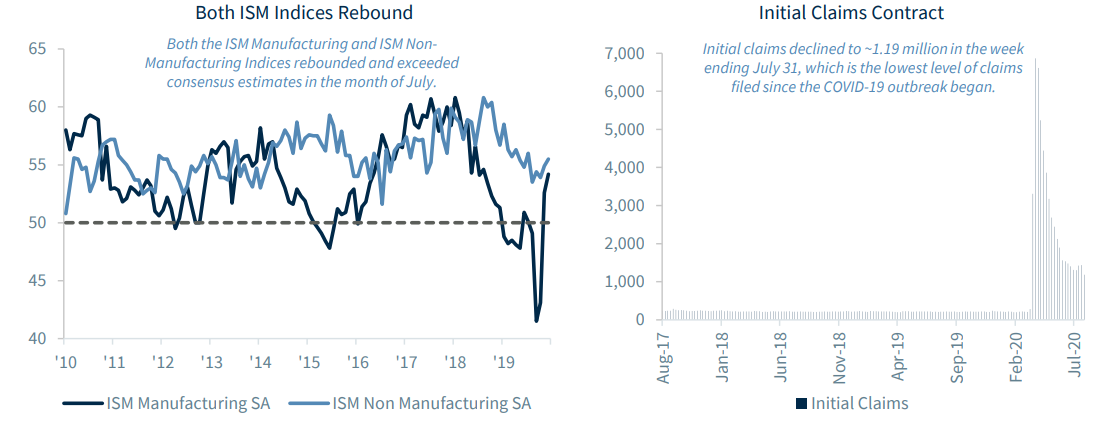

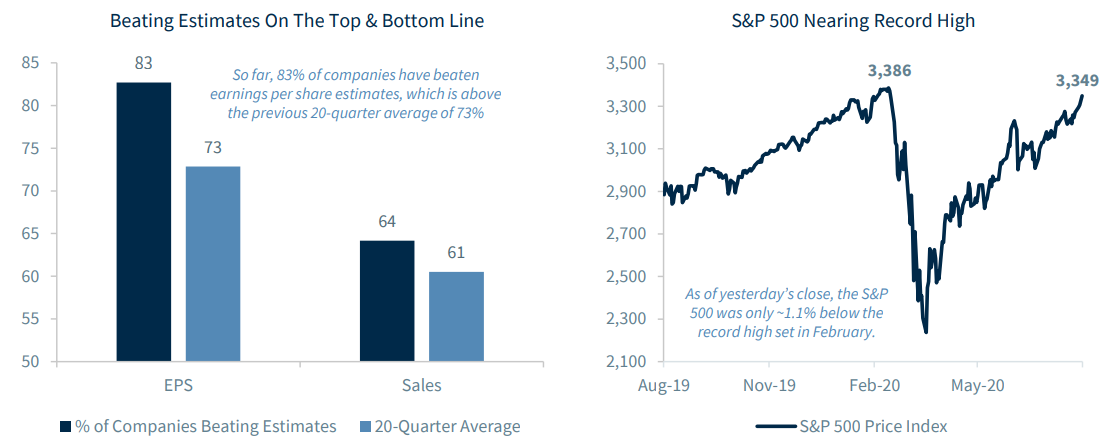

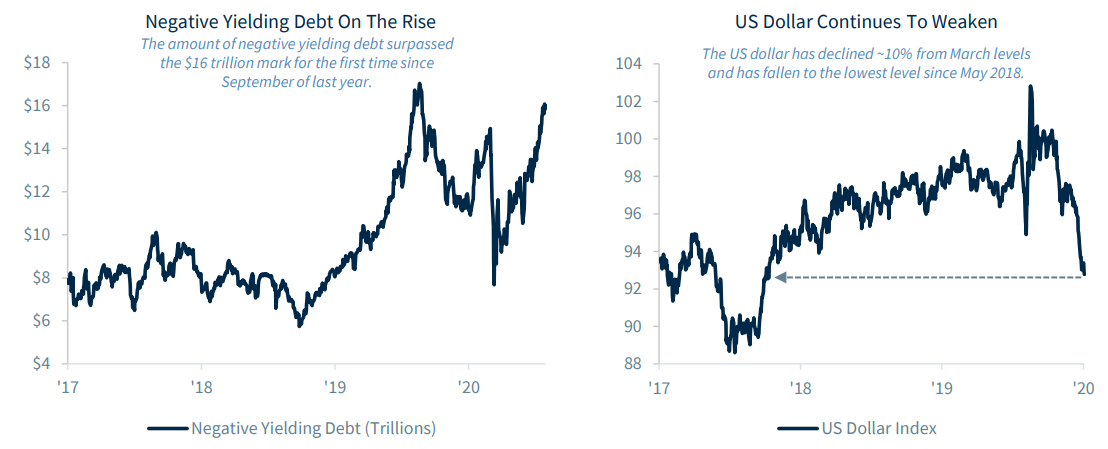

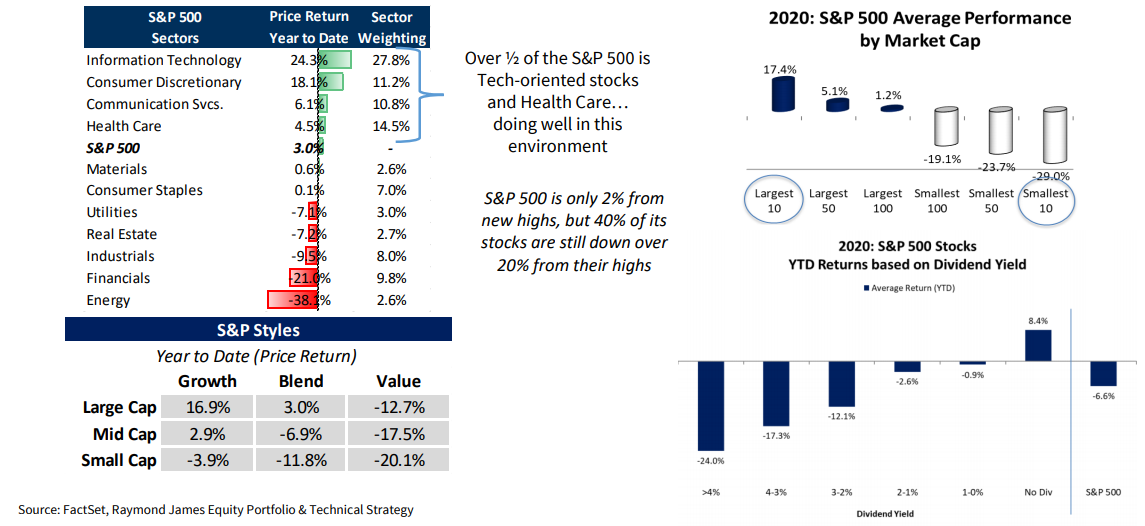

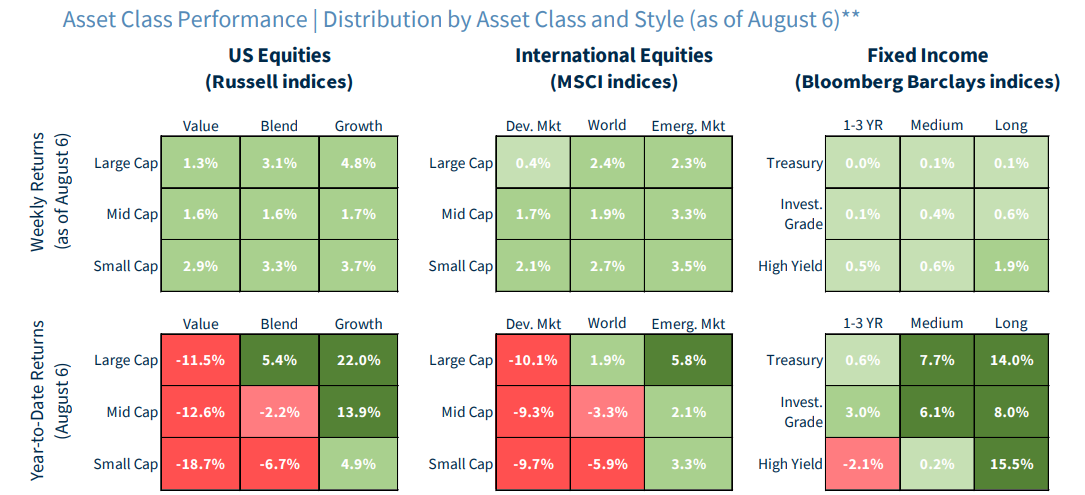

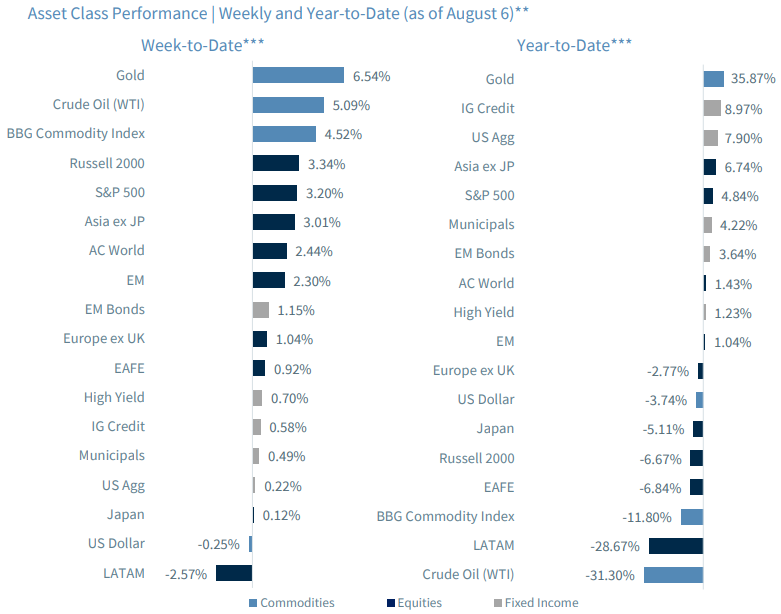

[Back to Table of Contents](#content)

<a id ="eco"></a>

## Key Economic Events Next Week 

In [17]:
HTML("""
<!-- TradingView Widget BEGIN -->
<div class="tradingview-widget-container">
  <div class="tradingview-widget-container__widget"></div>
  <div class="tradingview-widget-copyright"><a href="https://www.tradingview.com/markets/currencies/economic-calendar/" rel="noopener" target="_blank"><span class="blue-text">Economic Calendar</span></a> by TradingView</div>
  <script type="text/javascript" src="https://s3.tradingview.com/external-embedding/embed-widget-events.js" async>
  {
  "colorTheme": "light",
  "isTransparent": false,
  "width": "700",
  "height": "600",
  "locale": "en",
  "importanceFilter": "0,1"
}
  </script>
</div>
<!-- TradingView Widget END --> """)

[Back to Table of Contents](#content)